In [2]:
! pip install gymnasium
! pip install pygame

In [ ]:
env=gym.make("MountainCar-v0")

In [3]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="human")
observation, info = env.reset()
for i in range(400):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
        break

print("Finished in %i steps" % i)
env.close()

2025-11-04 14:16:00.539 python[43196:3548681] +[IMKClient subclass]: chose IMKClient_Modern
2025-11-04 14:16:00.539 python[43196:3548681] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Finished in 199 steps


In [8]:
import numpy as np
import matplotlib.pyplot as plt
def select_action(action_selection_code):
    if action_selection_code == 0:
        action = env.action_space.sample()
    elif action_selection_code == 1:
        action = 2
    elif action_selection_code == 2:
        if observation[0] > -0.53 and observation[1] > 0:
            action = 2
        elif observation[0] < -0.53 and observation[1] < 0:
            action = 0
        else:
            action = 1

    elif action_selection_code == 3:
        if observation[0] > -0.53 and observation[1] > 0:
            action = 2
        elif observation[0] < -0.53 and observation[1] < 0:
            action = 0
        elif observation[0] < -0.53 and observation[1] > 0:
            action = 2
        elif observation[0] > -0.53 and observation[1] < 0:
            action = 0
        else:
            action = 1
    else:
        action = 1

    return action

Action selection code 0: Random actions


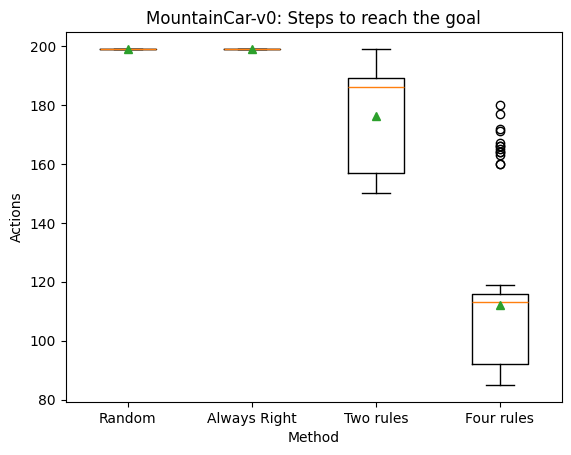

In [9]:
print("Action selection code 0: Random actions")
env = gym.make("MountainCar-v0")
observation, info = env.reset()
iter = 400
agents = 100
approaches = 4

steps = np.zeros((agents, approaches))

for k in range(approaches):
    for j in range(agents):
        for i in range(iter):
            action = select_action(k)
            observation, reward, terminated, truncated, info = env.step(action)

            if terminated or truncated:
                observation, info = env.reset()
                break
        steps[j][k] = i

bp = plt.boxplot(steps, showmeans=True)
plt.title("MountainCar-v0: Steps to reach the goal")
plt.xlabel("Method")
plt.ylabel("Actions")
plt.xticks(np.arange(1,5),("Random","Always Right","Two rules","Four rules"))
plt.show()

env.close()